# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
#Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

#build partial query URL
query_url = f'{url}appid={weather_api_key}&units={units}&q='

#set up lists to hold response info
cityList = []
lat = []
lng = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []

#Loop through the cities list and make request on each
count =1
setCount = 1
print(f'''Beginning Data Retrieval
------------------------''')

for city in cities:
    try:
        response = requests.get(query_url+city).json()
        cityList.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f'Processing Record {count} of Set {setCount} | {city}')
        count+=1
        
    except (KeyError):
        setCount+=1
        print('City not found. Skipping...')


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | beberibe
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | kitimat
City not found. Skipping...
Processing Record 5 of Set 2 | rikitea
City not found. Skipping...
Processing Record 6 of Set 3 | clyde river
Processing Record 7 of Set 3 | port lincoln
Processing Record 8 of Set 3 | georgetown
Processing Record 9 of Set 3 | jamestown
Processing Record 10 of Set 3 | lebu
Processing Record 11 of Set 3 | hermanus
Processing Record 12 of Set 3 | ushuaia
Processing Record 13 of Set 3 | nemuro
Processing Record 14 of Set 3 | mount gambier
Processing Record 15 of Set 3 | cape town
Processing Record 16 of Set 3 | khatanga
Processing Record 17 of Set 3 | albany
City not found. Skipping...
Processing Record 18 of Set 4 | caravelas
Processing Record 19 of Set 4 | boyolangu
Processing Record 20 of Set 4 | tumut
Processing Record 21 of Set 4 | vaini
Proc

Processing Record 181 of Set 18 | hokitika
City not found. Skipping...
Processing Record 182 of Set 19 | isangel
Processing Record 183 of Set 19 | san patricio
Processing Record 184 of Set 19 | bethel
Processing Record 185 of Set 19 | umm kaddadah
Processing Record 186 of Set 19 | provideniya
Processing Record 187 of Set 19 | praia
Processing Record 188 of Set 19 | homer
Processing Record 189 of Set 19 | laguna
Processing Record 190 of Set 19 | cayenne
Processing Record 191 of Set 19 | bluff
Processing Record 192 of Set 19 | lasa
Processing Record 193 of Set 19 | nizhniy kuranakh
Processing Record 194 of Set 19 | pecos
Processing Record 195 of Set 19 | constitucion
Processing Record 196 of Set 19 | turukhansk
Processing Record 197 of Set 19 | teahupoo
Processing Record 198 of Set 19 | morondava
Processing Record 199 of Set 19 | sayaxche
Processing Record 200 of Set 19 | poso
Processing Record 201 of Set 19 | saint-augustin
Processing Record 202 of Set 19 | francisco beltrao
Processing 

Processing Record 364 of Set 28 | salamiyah
Processing Record 365 of Set 28 | lerwick
Processing Record 366 of Set 28 | kavieng
Processing Record 367 of Set 28 | ilhabela
Processing Record 368 of Set 28 | tucuma
Processing Record 369 of Set 28 | terney
Processing Record 370 of Set 28 | pisco
Processing Record 371 of Set 28 | monchique
Processing Record 372 of Set 28 | bambanglipuro
Processing Record 373 of Set 28 | neiafu
Processing Record 374 of Set 28 | santa isabel
City not found. Skipping...
Processing Record 375 of Set 29 | grindavik
Processing Record 376 of Set 29 | omsukchan
Processing Record 377 of Set 29 | ormstown
Processing Record 378 of Set 29 | miles city
Processing Record 379 of Set 29 | colac
Processing Record 380 of Set 29 | henties bay
Processing Record 381 of Set 29 | tabou
Processing Record 382 of Set 29 | shurob
Processing Record 383 of Set 29 | ende
Processing Record 384 of Set 29 | sovetskiy
Processing Record 385 of Set 29 | tromso
Processing Record 386 of Set 29 

City not found. Skipping...
Processing Record 546 of Set 45 | portalegre
Processing Record 547 of Set 45 | nioro
Processing Record 548 of Set 45 | darhan
Processing Record 549 of Set 45 | uige
Processing Record 550 of Set 45 | monte patria
Processing Record 551 of Set 45 | suna
Processing Record 552 of Set 45 | gigmoto
Processing Record 553 of Set 45 | charters towers
Processing Record 554 of Set 45 | buraydah
Processing Record 555 of Set 45 | inverell
Processing Record 556 of Set 45 | keflavik
City not found. Skipping...
Processing Record 557 of Set 46 | beyneu
Processing Record 558 of Set 46 | harrai
Processing Record 559 of Set 46 | kouango
Processing Record 560 of Set 46 | fenyi
Processing Record 561 of Set 46 | dalianwan
Processing Record 562 of Set 46 | alice springs
Processing Record 563 of Set 46 | mazagao
Processing Record 564 of Set 46 | prijepolje
Processing Record 565 of Set 46 | tosno
Processing Record 566 of Set 46 | vilyuysk
Processing Record 567 of Set 46 | durango
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weatherDF = pd.DataFrame({
    "City":cityList,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":maxTemp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":windSpeed,
    "Country":country,
    "Date":date
})
weatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,12.00,82,98,3.09,ZA,1621139142
1,Beberibe,-4.1797,-38.1306,25.56,94,40,2.06,BR,1621139203
2,Bambous Virieux,-20.3428,57.7575,25.56,78,75,5.66,MU,1621139204
3,Kitimat,54.0524,-128.6534,10.56,89,100,0.45,CA,1621139204
4,Rikitea,-23.1203,-134.9692,23.78,65,92,8.19,PF,1621139699


In [17]:
weatherDF.describe()
#Max humidity is 100%, nothing over 100% humidity to remove

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,17.629121,22.113340,18.152702,68.459552,54.824441,3.524664,1.621140e+09
std,33.574002,91.396156,9.372591,22.183028,37.557361,2.351222,1.690010e+02
min,-54.800000,-175.200000,-12.400000,1.000000,0.000000,0.140000,1.621139e+09
25%,-11.384700,-56.086100,12.000000,55.000000,20.000000,1.690000,1.621140e+09
50%,20.700000,26.083300,19.000000,73.000000,66.000000,3.090000,1.621140e+09
75%,45.762500,106.883200,25.560000,86.000000,90.000000,4.940000,1.621140e+09
max,78.218600,179.316700,39.740000,100.000000,100.000000,16.090000,1.621140e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

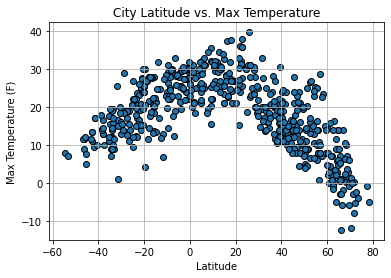

In [24]:
#Scatter Plot
plt.scatter(weatherDF['Lat'],weatherDF['Max Temp'],edgecolor='black')

#Adding info
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature')
plt.grid()

#Save and Show
plt.savefig('Output/Temperature vs Latitude.png')
plt.show()

#### Observations on City Latitude vs. Max Temperature
* As we get closer to the equator (Latitude 0) we see higher maximum temperatures.

## Latitude vs. Humidity Plot

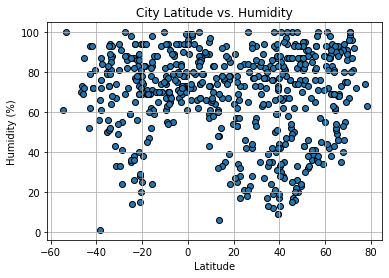

In [27]:
#Scatter Plot
plt.scatter(weatherDF['Lat'],weatherDF['Humidity'],edgecolor='black')

#Adding info
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity')
plt.grid()

#Save and Show
plt.savefig('Output/Humidity vs Latitude.png')
plt.show()

#### Observations on City Latitude vs. Humidity
* As we get closer to the equator (Latitude 0) we see that there Humidity tends to be higher.
* Humidity further away from the equater tend to be scattered and not have a consistent pattern. 

## Latitude vs. Cloudiness Plot

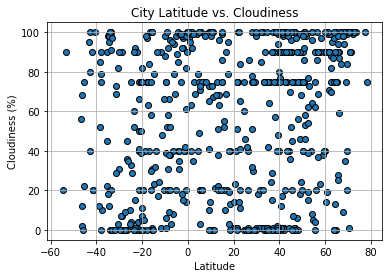

In [28]:
#Scatter Plot
plt.scatter(weatherDF['Lat'],weatherDF['Cloudiness'],edgecolor='black')

#Adding info
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness')
plt.grid()

#Save and Show
plt.savefig('Output/Cloudiness vs Latitude.png')
plt.show()

#### Observations on City Latitude vs. Cloudiness
* There seems to be no discernible relationship between distance from the equator and cloud coverage

## Latitude vs. Wind Speed Plot

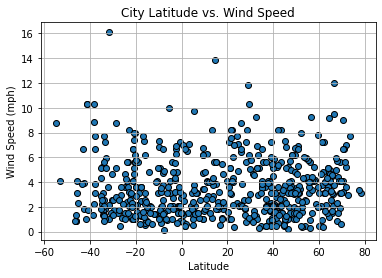

In [29]:
#Scatter Plot
plt.scatter(weatherDF['Lat'],weatherDF['Wind Speed'],edgecolor='black')

#Adding info
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed')
plt.grid()

#Save and Show
plt.savefig('Output/Wind Speed vs Latitude.png')
plt.show()

#### Observations on City Latitude vs. Cloudiness
* There seems to be no discernible relationship between distance from the equator and wind speed

## Linear Regression

In [36]:
#Split DF into Northern and southern hemisphere DF's
northDF = weatherDF.loc[weatherDF['Lat']>0]
southDF = weatherDF.loc[weatherDF['Lat']<0]
northDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Kitimat,54.0524,-128.6534,10.56,89,100,0.45,CA,1621139204
5,Clyde River,70.4692,-68.5914,-12.00,67,1,4.12,CA,1621139700
7,George Town,5.4112,100.3354,32.22,74,20,2.06,MY,1621139412
8,Jamestown,42.0970,-79.2353,13.00,35,1,1.54,US,1621139130
12,Nemuro,43.3236,145.5750,13.00,94,75,8.23,JP,1621139414


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [41]:
#Pull/ print regression info
(slope,intercept,rvalue,pvalue,stderr) = linregress(northDF['Lat'],northDF['Max Temp'])
regress_values = northDF['Lat'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
print(f'The r-value is: {rvalue}')

#Scatter Plot
plt.scatter(weatherDF['Lat'],weatherDF['Wind Speed'],edgecolor='black')

#Adding info
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed')
plt.grid()

#Save and Show
plt.savefig('Output/Wind Speed vs Latitude.png')
plt.show()

The r-value is: -0.8125116591990538


The r-value is: 0.46937863826630627


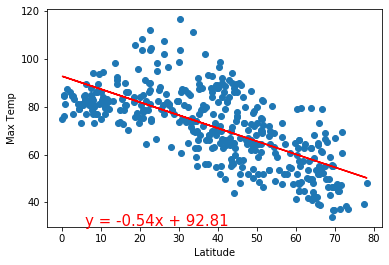

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


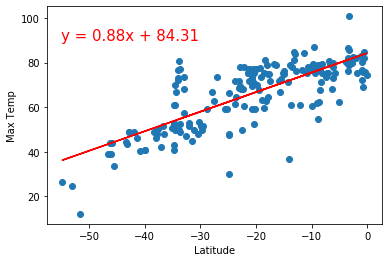

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


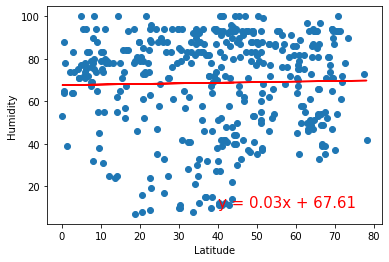

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


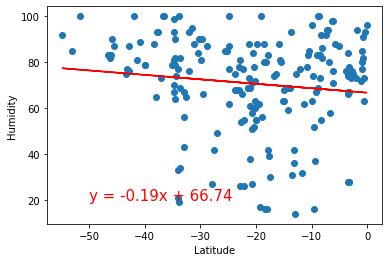

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


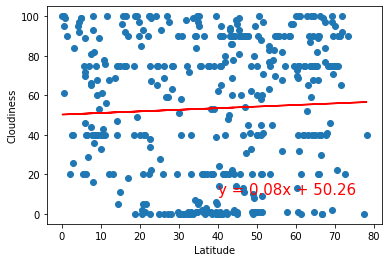

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


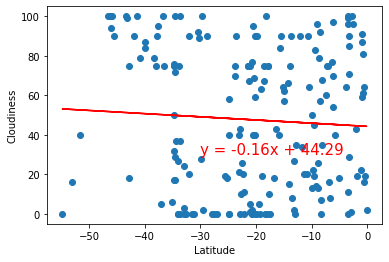

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


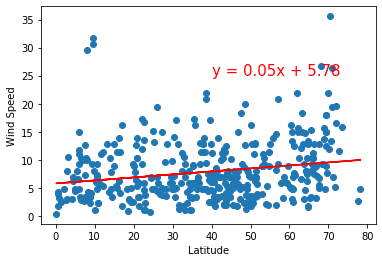

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


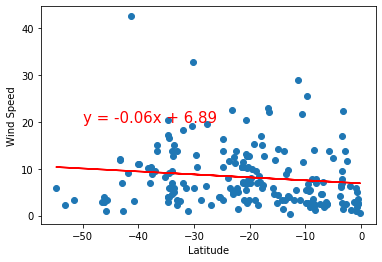